In [1]:
import pandas as pd

In [2]:
import numpy as np

In [4]:
Actual = pd.read_excel('Downloads\Actuals.xlsx')

Actuals.drop('ABS',axis=1,inplace=True)
Actuals.drop('Quant',axis=1,inplace=True)

Actuals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20813 entries, 0 to 20812
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Material Description  20812 non-null  object 
 1   Plant                 20812 non-null  object 
 2   Period                20813 non-null  float64
 3   Year                  20813 non-null  float64
 4   Amount in LC          20813 non-null  float64
 5   Quantity              20813 non-null  float64
dtypes: float64(4), object(2)
memory usage: 975.7+ KB


In [5]:
Target = pd.read_excel('Downloads\TargetNew.xlsx')
Target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                287 non-null    float64
 1   Period              287 non-null    float64
 2   Plant               161 non-null    object 
 3   Material Number     241 non-null    object 
 4   Target Value in LC  287 non-null    float64
 5   Target Quantity     287 non-null    float64
dtypes: float64(4), object(2)
memory usage: 13.6+ KB


In [8]:
Actuals.isnull().sum()

Material Description    1
Plant                   1
Period                  0
Year                    0
Amount in LC            0
Quantity                0
dtype: int64

In [7]:
BCR = pd.read_excel('Downloads\B&CRNew.xlsx')
BCR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Material Number  74 non-null     object
 1   Bottle           61 non-null     object
 2   Crate            69 non-null     object
dtypes: object(3)
memory usage: 1.9+ KB


In [6]:
Prices = pd.read_excel('Downloads\priceNew.xlsx')
Prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Plant                 491 non-null    object 
 1   Material Description  491 non-null    object 
 2    Price per case       491 non-null    float64
dtypes: float64(1), object(2)
memory usage: 11.6+ KB


In [9]:
Actuals.dropna(subset=Actuals.columns,inplace=True)

In [10]:
Actuals.isnull().sum()

Material Description    0
Plant                   0
Period                  0
Year                    0
Amount in LC            0
Quantity                0
dtype: int64

In [11]:
Target.isnull().sum()

Year                    0
Period                  0
Plant                 126
Material Number        46
Target Value in LC      0
Target Quantity         0
dtype: int64

In [27]:
Target.dropna(subset=Target.columns,inplace=True)
Target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 1 to 286
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                155 non-null    float64
 1   Period              155 non-null    float64
 2   Plant               155 non-null    object 
 3   Material Number     155 non-null    object 
 4   Target Value in LC  155 non-null    float64
 5   Target Quantity     155 non-null    float64
dtypes: float64(4), object(2)
memory usage: 8.5+ KB


In [13]:
Target.isnull().sum()

Year                  0
Period                0
Plant                 0
Material Number       0
Target Value in LC    0
Target Quantity       0
dtype: int64

In [14]:
Prices.isnull().sum()

Plant                   0
Material Description    0
 Price per case         0
dtype: int64

In [15]:
Prices.dropna(subset=Prices.columns,inplace=True)

In [16]:
Prices.isnull().sum()

Plant                   0
Material Description    0
 Price per case         0
dtype: int64

In [17]:
BCR.isnull().sum()

Material Number     0
Bottle             13
Crate               5
dtype: int64

In [18]:
BCR.dropna(subset=BCR.columns,inplace=True)

In [19]:
BCR.isnull().sum()

Material Number    0
Bottle             0
Crate              0
dtype: int64

In [39]:
BCR.rename(columns={"Material Number":"Material Description"},inplace=True)
BCR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Material Description  56 non-null     object
 1   Bottle                56 non-null     object
 2   Crate                 56 non-null     object
dtypes: object(3)
memory usage: 1.8+ KB


In [22]:
merged_data = pd.merge(Actuals, Prices, on=["Material Description", "Plant"], how="left")


In [62]:
consolidated_data["Bottle Rands"] = consolidated_data[" Price per case "] * consolidated_data["Quantity"]


In [23]:
consolidated_data = pd.merge(merged_data, BCR, left_on="Material Description", right_on="Material Number", how="left")


In [65]:
consolidated_data["Crate Rands"] = consolidated_data[" Price per case "] * consolidated_data["Quantity"]

In [67]:
consolidated_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40542 entries, 0 to 40541
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Material Description  40542 non-null  object 
 1   Plant                 40542 non-null  object 
 2   Period                40542 non-null  float64
 3   Year                  40542 non-null  float64
 4   Amount in LC          40542 non-null  float64
 5   Quantity              40542 non-null  float64
 6    Price per case       40521 non-null  float64
 7   Material Number       39342 non-null  object 
 8   Bottle                39342 non-null  object 
 9   Crate                 39342 non-null  object 
 10  Bottle Rands          40521 non-null  float64
 11  Crate Rands           40521 non-null  float64
dtypes: float64(7), object(5)
memory usage: 4.0+ MB


In [28]:
Target.rename(columns={"Material Number":"Material Description"},inplace=True)

In [29]:
Target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 1 to 286
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  155 non-null    float64
 1   Period                155 non-null    float64
 2   Plant                 155 non-null    object 
 3   Material Description  155 non-null    object 
 4   Target Value in LC    155 non-null    float64
 5   Target Quantity       155 non-null    float64
dtypes: float64(4), object(2)
memory usage: 8.5+ KB


In [30]:
Variandedf = pd.merge(Actuals, Target, on=['Year', 'Period', 'Plant', 'Material Description'], how='inner')

In [31]:
Variandedf['Amount Variance'] = Variandedf['Amount in LC'] - Variandedf['Target Value in LC']
Variandedf['Quantity Variance'] = Variandedf['Quantity'] - Variandedf['Target Quantity']


In [32]:
Variandedf.head()

,Material Description,Plant,Period,Year,Amount in LC,Quantity,Target Value in LC,Target Quantity,Amount Variance,Quantity Variance
0,Crate: Red Quart,AA,7.0,2022.0,2035.272727,139.090909,1.439881e+06,99474.848485,-1.437846e+06,-99335.757576
1,Crate: Red Quart,AA,7.0,2022.0,2035.272727,139.090909,9.464318e+02,66.899091,1.088841e+03,72.191818
2,Crate: Red Quart,AA,7.0,2022.0,2035.272727,139.090909,0.000000e+00,0.000000,2.035273e+03,139.090909
3,Crate: Red Quart,AA,7.0,2022.0,1552.772727,105.757576,1.439881e+06,99474.848485,-1.438328e+06,-99369.090909
4,Crate: Red Quart,AA,7.0,2022.0,1552.772727,105.757576,9.464318e+02,66.899091,6.063409e+02,38.858485


In [33]:
Variandedf['Amount Variance']=Variandedf['Amount Variance'].abs()
Variandedf['Quantity Variance']=Variandedf['Quantity Variance'].abs()

In [34]:
Variandedf.head()

,Material Description,Plant,Period,Year,Amount in LC,Quantity,Target Value in LC,Target Quantity,Amount Variance,Quantity Variance
0,Crate: Red Quart,AA,7.0,2022.0,2035.272727,139.090909,1.439881e+06,99474.848485,1.437846e+06,99335.757576
1,Crate: Red Quart,AA,7.0,2022.0,2035.272727,139.090909,9.464318e+02,66.899091,1.088841e+03,72.191818
2,Crate: Red Quart,AA,7.0,2022.0,2035.272727,139.090909,0.000000e+00,0.000000,2.035273e+03,139.090909
3,Crate: Red Quart,AA,7.0,2022.0,1552.772727,105.757576,1.439881e+06,99474.848485,1.438328e+06,99369.090909
4,Crate: Red Quart,AA,7.0,2022.0,1552.772727,105.757576,9.464318e+02,66.899091,6.063409e+02,38.858485


In [50]:
BCR.set_index('Material Description',inplace = True)

In [52]:
bottle_count = BCR['Bottle'].value_counts()
crate_count = BCR['Crate'].value_counts()

In [53]:
bottle_count

Crate: Red Quart                            5
Crate: Brown Quart                          5
Crate: Navy Quart                           4
Bottle: 660RB Flint Bella                   3
Crate: Yellow Quart                         3
XXBottle 750NRB AmberP/OCalabash(Vaslin)    2
Crate: Black Quart                          2
Bottle: 660RB Green Lite                    2
Bottle: CLT 660ml NRB BIG                   1
CRATE: KBL PLASTIC RED (BOTSWANA)           1
Bottle: 660RB Green Fish                    1
XXXX Bottle:  Quart Bottles for Culling     1
Crate: 910ML Red                            1
XXX Bottle: 660ml NRB Green Diner (BOTS)    1
Bottle: 910RB Green                         1
CRATE: 750ML RB PLASTIC (BOTSWANA)          1
Bottle: 750ml RB Green Elite                1
Bottle: 750RB Amber Calabash                1
XXX Bottle: 750ml RB Amber Quart (BOTS)     1
Bottle: 660RB Flint MGD                     1
Bottle: 1000RB Amber                        1
Bottle: 660RB Green Beck's        

In [54]:
crate_count

Crate: Red Quart                            9
Crate: Navy Quart                           7
Crate: Brown Quart                          5
Crate: Yellow Quart                         5
Crate: Black Quart                          4
Crate: Green Quart                          2
Crate: 910ML Red                            2
XXBottle 750NRB AmberP/OCalabash(Vaslin)    2
Crate: Brown Pint                           2
Crate: 1L Brown                             2
Crate: Blue Quart                           2
Crate: Grey Quart                           2
Crate: Blue Pint                            2
XXX Bottle: 660ml NRB Green Diner           1
XXXX Bottle:  Quart Bottles for Culling     1
CRATE: KBL PLASTIC RED (BOTSWANA)           1
XXX Bottle: 660ml NRB Green Diner (BOTS)    1
CRATE: 750ML RB PLASTIC (BOTSWANA)          1
XXX Bottle: 750ml RB Amber Quart (BOTS)     1
Bottle: 660RB Flint MGD                     1
Bottle: 660RB Green Peroni                  1
Bottle: 660RB Flint Bella         

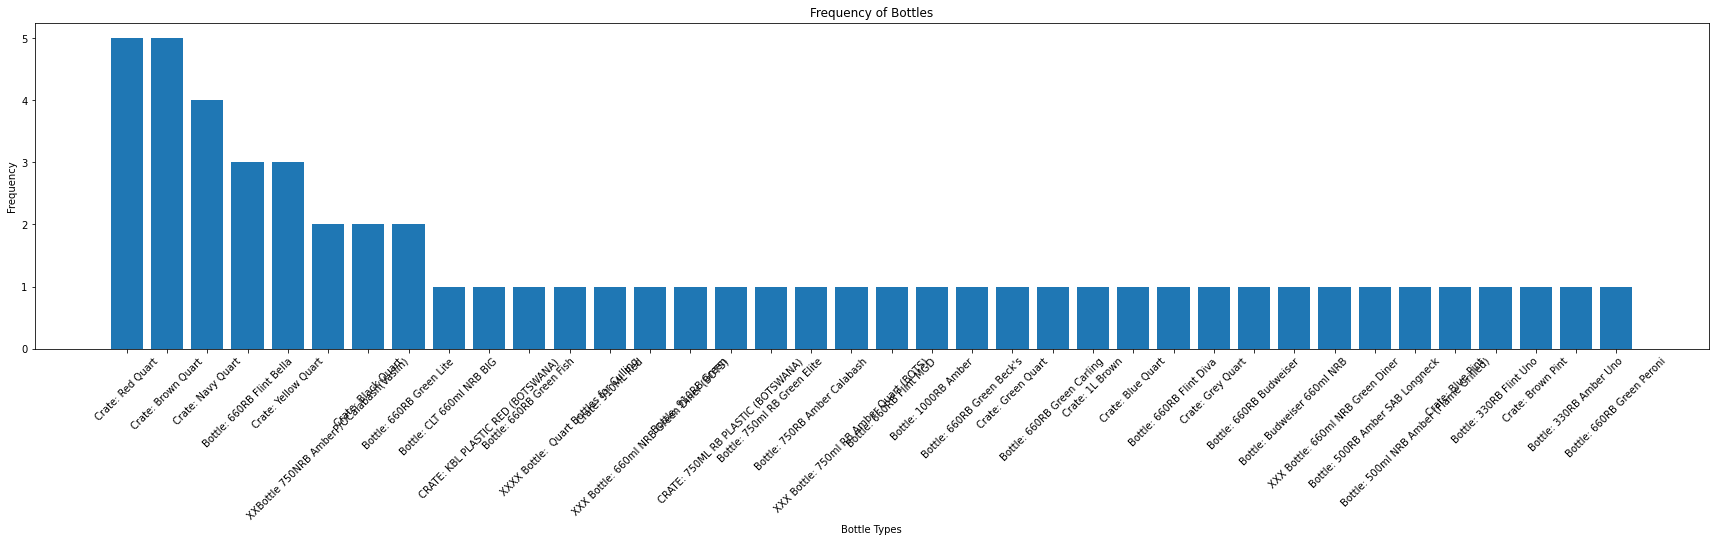

In [58]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(30, 6))  # Set the figure size
plt.bar(bottle_counts.index, bottle_counts.values)
plt.title('Frequency of Bottles')
plt.xlabel('Bottle Types')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

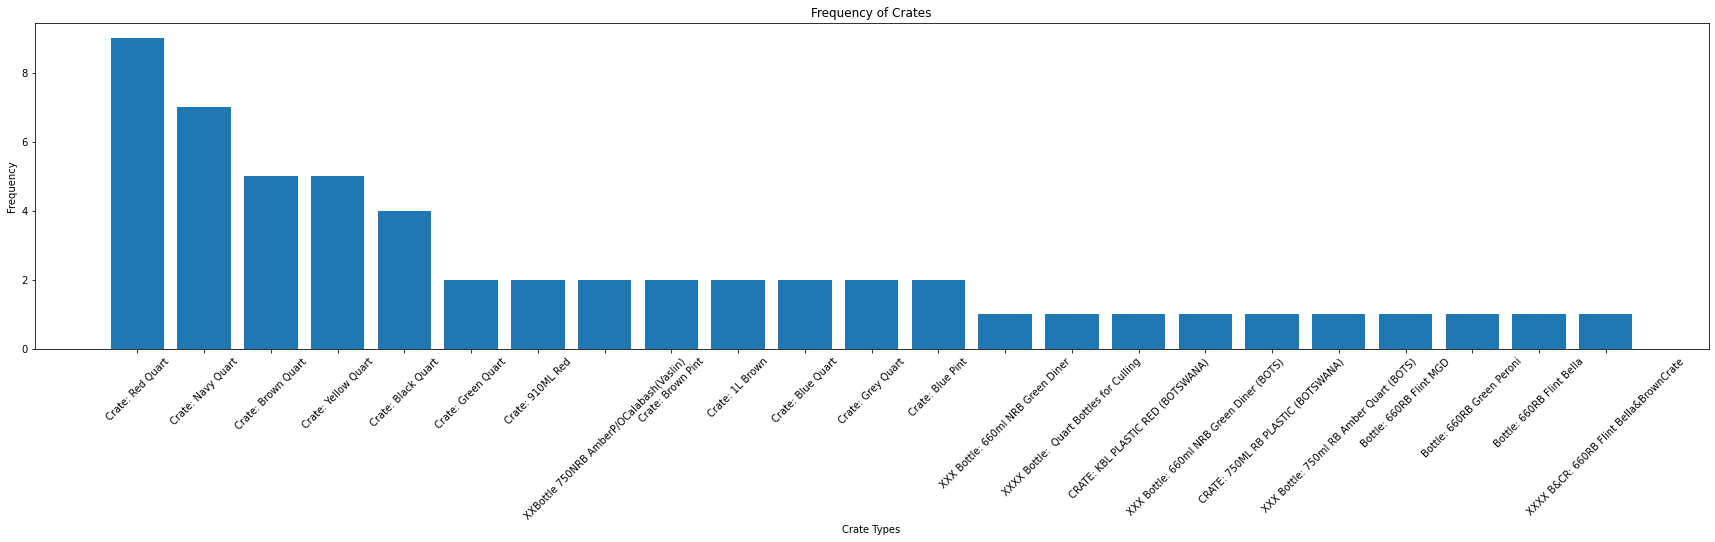

In [59]:
plt.figure(figsize=(30, 6))  # Set the figure size
plt.bar(crate_counts.index, crate_counts.values)
plt.title('Frequency of Crates')
plt.xlabel('Crate Types')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

In [60]:
plant_counts = Actuals['Plant'].value_counts()
plant_counts

AA    5982
AG    4923
AC    3278
AE    3272
AD    1377
AF    1291
AB     689
Name: Plant, dtype: int64

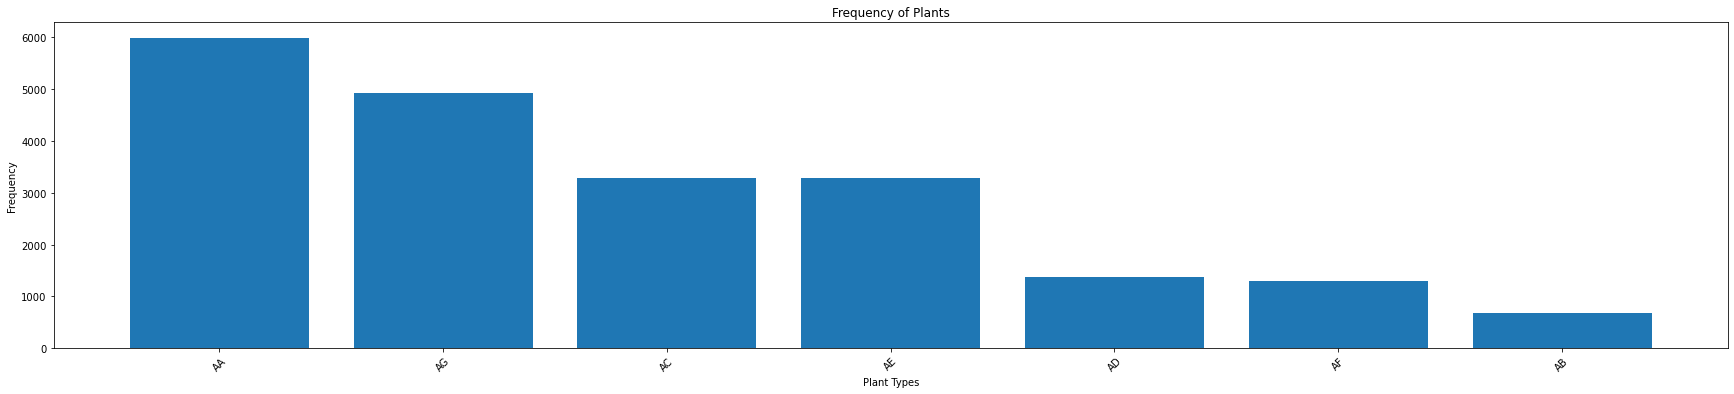

In [61]:
plt.figure(figsize=(30, 6))  # Set the figure size
plt.bar(plant_counts.index, plant_counts.values)
plt.title('Frequency of Plants')
plt.xlabel('Plant Types')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()